In [1]:
## last edited: 5/27/22
## Status: Fixed path names to match new directory structure. 
##         Plots CRL swaths throught eye, eyewall, and rainbands for most 2021 TCs


import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [19]:
# view + choose data
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_list = make_plots.load_crl( crl_path)

data = xr.open_dataset( crl_list[ 12])

number_points = len( data.H)
height = (- data.H[0] + data.H[-1] ) * 1000
height = height.values

print( "Average height resolution of CRL data: " + str( height / number_points) + ' m')

tot_time_secs =  ( data.time[-1] - data.time[0] ) * 60 * 60 # total flight time in seconds
bins = len( data.time)
avg_bin_time = tot_time_secs / bins # how long it takes to cross one dat point / bin
p3_speed = 110 # speed of plane in m/s

avg_bin_dist = avg_bin_time * p3_speed

print( "bins: " + str( bins))

print( "Average horizontal resolution of CRL data: " + str( avg_bin_dist.values) + ' m')
 
data

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf
Average height resolution of CRL data: 5.989899137606123 m
bins: 13214
Average horizontal resolution of CRL data: 220.33052890477933 m


<xarray.Dataset>
Dimensions:             (Time: 13214, layers: 594)
Dimensions without coordinates: Time, layers
Data variables:
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (Time) float32 ...
    Lat                 (Time) float32 ...
    H                   (layers) float32 ...
    time                (Time) float32 ...
    LSR                 (Time, layers) float32 ...
    WVMR                (Time, layers) float32 ...
    T                   (Time, layers) float32 ...
    P_ch1               (Time, layers) float32 ...
Attributes:
    global_att:    This file is generated with our Compact Raman lidar measur...
    global_att1:   The data for each flight is mapped to the same height bin ...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu

In [3]:
# update font sizes for this plot!
SMALL_SIZE = 18
MEDIUM_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

range(0, 10)
range(0, 10)
range(0, 10)
range(0, 10)
range(0, 10)
range(0, 10)


C:\Users\etmu9498\research\code\scripts\make_plots.py:133: RuntimeWarning: Mean of empty slice
  # make an array of average temperatures within the correct bounds. A matrix


CPU times: total: 31.5 s
Wall time: 31.7 s


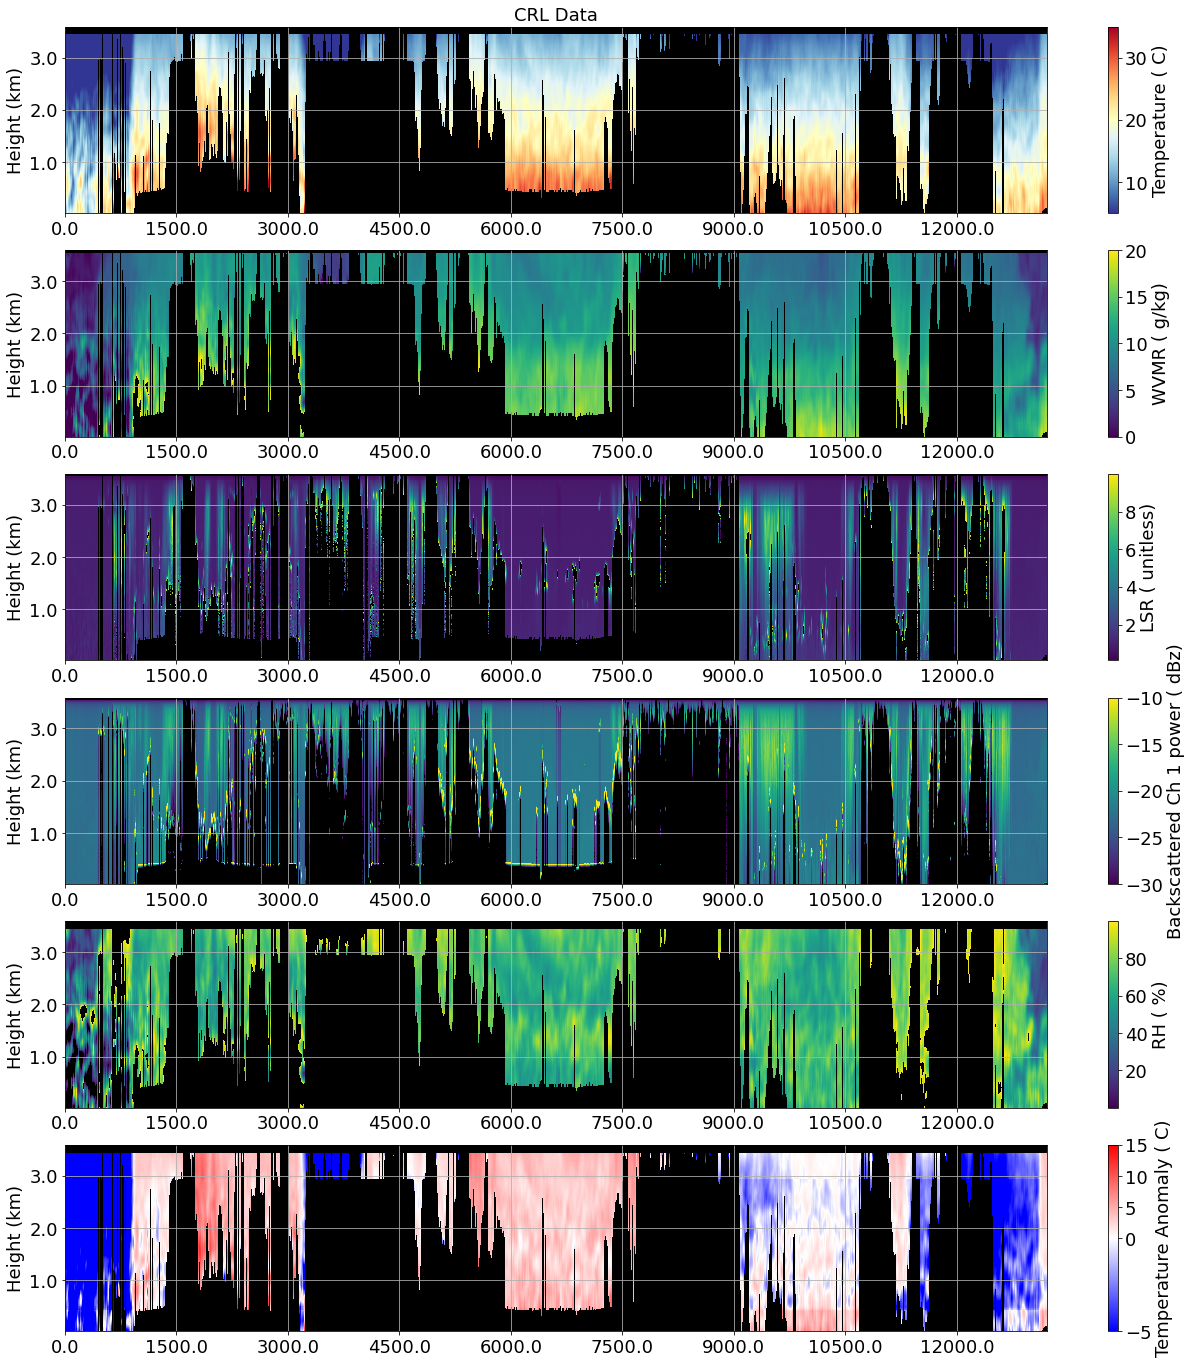

In [4]:
%%time

# title = "CRL Data, TS Fred, 8/11/21"
title = 'CRL Data'

make_plots.plot_full_dataset_one_day( crl_path, crl_list[12], 'lon-str', title=title)
# make_plots.plot_full_datasets( tc='henri', xaxis='lon-str')

Text(0.5, 0, 'Time (UTC, Hours)')

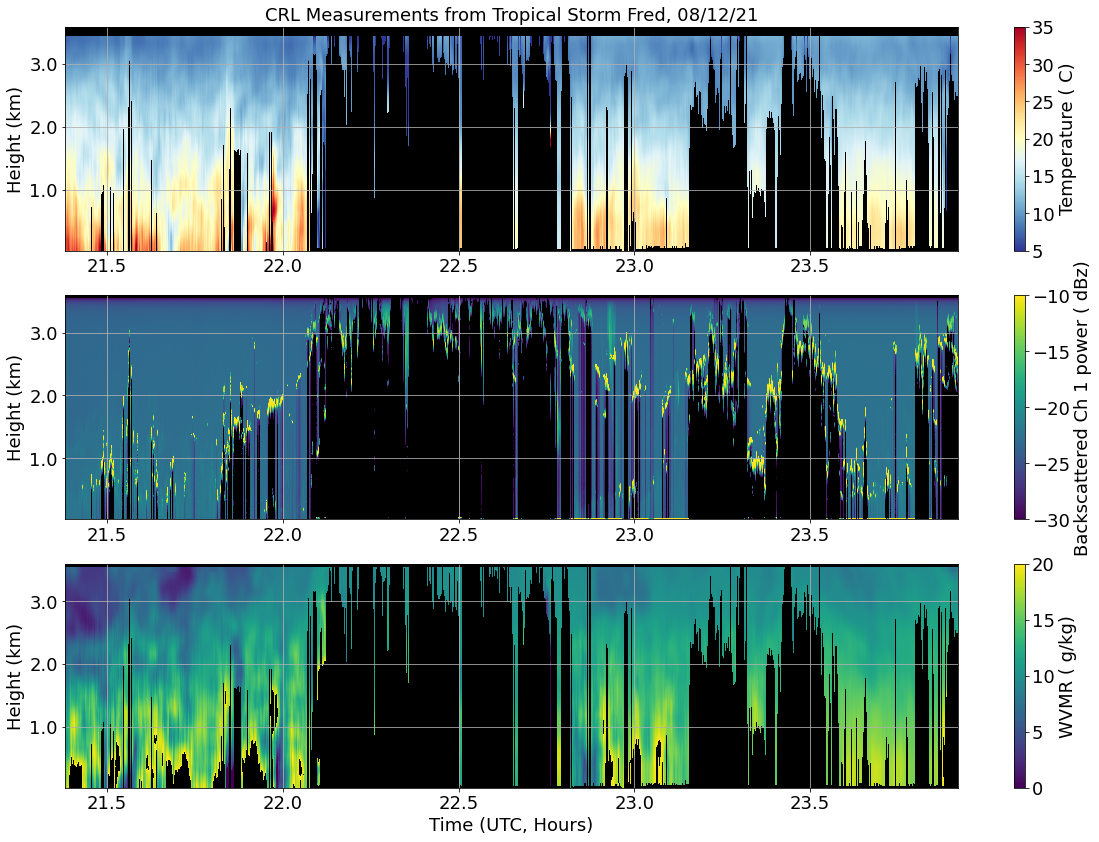

In [4]:
# fred 8/11 all data:
# plt.figure( figsize=(20, 8))
# plt.subplot(211)
# make_plots.plot_T( crl_path, crl_list[0], 0, 5032, 'lon')
# plt.subplot(212)
# make_plots.plot_power_ch1( crl_path, crl_list[0], 0, 5032, 'lon')


# fred 8/12 am all data:
# plt.figure( figsize=(20, 8))
# plt.subplot(211)
# make_plots.plot_T( crl_path, crl_list[1], 0, 5519, 'time')
# plt.subplot(212)
# make_plots.plot_power_ch1( crl_path, crl_list[1], 0, 5519, 'time')


# fred 8/12 pm all data:

plt.figure( figsize=(20, 14))
plt.subplot(311)
plt.title( 'CRL Measurements from Tropical Storm Fred, 08/12/21')
make_plots.plot_T( crl_path, crl_list[2], 0, 4564, 'time')
plt.subplot(312)
make_plots.plot_power_ch1( crl_path, crl_list[2], 0, 4564, 'time')
plt.subplot(313)
make_plots.plot_wvmr( crl_path, crl_list[2], 0, 4564, 'time')
plt.xlabel( "Time (UTC, Hours)")

# grace 8/16 eye 1: 
# title = "CRL Measurements of Hurricane Grace, 8/16/21, Eye Pass 1"
# make_plots.plot_all( crl_path, crl_list[4], title, 3000, 4500, 'time')

# grace 8/16 eye 2: 
# title = "CRL Measurements of Hurricane Grace, 8/16/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[4], title, 5000, 6658, 'time')

# grace 8/17 eye 1:
# title = "CRL Measurements of Hurricane Grace, 8/17/21, Eye Pass 1"
# make_plots.plot_all( crl_path, crl_list[6], title, 0, 1800, 'time')

# grace 8/17 eye 2:
# title = "CRL Measurements of Hurricane Grace, 8/17/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[6], title, 2250, 4100, 'time')

# grace 8/17 eye 3:
# title = "CRL Measurements of Hurricane Grace, 8/17/21, Eye Pass 3"
# make_plots.plot_all( crl_path, crl_list[6], title, 4800, 6550, 'time')




# grace 8/19 (category 3) eye 1: 
# title = "CRL Measurements of Hurricane Grace, 8/19/21, Eye Pass 1"
# make_plots.plot_all( crl_path, crl_list[8], title, 0, 1800, 'time')

# grace 8/19 eye 2: 
# title = "CRL Measurements of Hurricane Grace, 8/19/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[8], title, 1800, 3600, 'time')

# grace 8/19 eye 3: 
# title = "CRL Measurements of Hurricane Grace, 8/19/21, Eye Pass 3"
# make_plots.plot_all( crl_path, crl_list[8], title, 4000, 5500, 'time')



# title = "CRL Measurements of Hurricane Grace, 8/19/21, all data"
# make_plots.plot_all( crl_path, crl_list[8], title, 0, 5500, 'time')




# henri 8/21 all data:
# title = "CRL Measurements of Hurricane Ida, 8/27/21"
# make_plots.plot_all( crl_path, crl_list[11], title, 0, 8445, 'time')

# henri 8/21 eye 1:
# title = "CRL Measurements of Hurricane Henri, 8/21/21, eye 1"
# make_plots.plot_all( crl_path, crl_list[11], title, 1000, 2500, 'time')

# henri 8/21 eye 2:
# title = "CRL Measurements of Hurricane Henri, 8/21/21, eye 2"
# make_plots.plot_all( crl_path, crl_list[11], title, 3000, 4500, 'time')

# henri 8/21 eye 3:
# title = "CRL Measurements of Hurricane Henri, 8/21/21, eye 3"
# make_plots.plot_all( crl_path, crl_list[11], title, 7000, 8445, 'time')




# ida 8/27 everything:

# cold air from 3000 to 4000 is from p3 flying a microphysical spiral!
# fig = plt.figure( figsize=(20, 4))
# title = "CRL Measurements of Hurricane Ida, 8/27/21, Eye Pass 1"
# make_plots.plot_all( crl_path, crl_list[12], title, 0, 13213, 'time')

# ida 8/27 eye 2 (or 3?):
# title = "CRL Measurements of Hurricane Ida, 8/27/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[12], title, 7000, 10000, 'time')

# ida 8/27 eye 3 (or 4?):
# title = "CRL Measurements of Hurricane Ida, 8/27/21, Eye Pass 3"
# make_plots.plot_all( crl_path, crl_list[12], title, 9500, 13200, 'time')

# ida 8/28 all data:
# title = "CRL Measurements of Hurricane Ida, 8/28/21"
# make_plots.plot_all( crl_path, crl_list[13], title, 0, 4024, 'time')

# ida 8/29
# title = "CRL Measurements of Hurricane Ida, 8/29/21"
# make_plots.plot_all( crl_path, crl_list[14], title, 0, 9900, 'time')

# ida eye pass 1 (eye pass 2 was lost)
# title = "CRL Measurements of Hurricane Ida, 8/29/21, eye 1"
# make_plots.plot_all( crl_path, crl_list[14], title, 1500, 4700, 'lon') # 4700




# sam 9/26 eye 1: 200 to 1500. ** this plot looks different!
# title = "CRL Measurements of Hurricane Sam, 9/26/21, Eye Pass 1"
# make_plots.plot_all( crl_path, crl_list[16], title, 200, 1600, 'time')

# sam 9/26 eye 2: 2350 to 3800
# title = "CRL Measurements of Hurricane Sam, 9/26/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[16], title, 2350, 3800, 'lon')

# sam 9/26 ey3 3: 4400 to 5600
# title = "CRL Measurements of Hurricane Sam, 9/26/21, Eye Pass 3"
# make_plots.plot_all( crl_path, crl_list[16], title, 4400, 5600, 'time')


# sam 9/27 eye 2: 2600 to 3900
# title = "CRL Measurements of Hurricane Sam, 9/27/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[17], title, 2600, 3900, 'time')

# sam 9/27 eye 3: 4700 to 6000
# title = "CRL Measurements of Hurricane Sam, 9/27/21, Eye Pass 3"
# make_plots.plot_all( crl_path, crl_list[17], title, 5300, 5500, 'time')


# sam 9/29 eye 1: 0 to 1600
# title = "CRL Measurements of Hurricane Sam, 9/29/21, Eye Pass 1"
# make_plots.plot_all( crl_path, crl_list[18], title, 0, 1600, 'time')

# sam 9/29 eye 2: 2100 to 3800
# title = "CRL Measurements of Hurricane Sam, 9/29/21, Eye Pass 2"
# make_plots.plot_all( crl_path, crl_list[18], title, 2100, 3800, 'time')

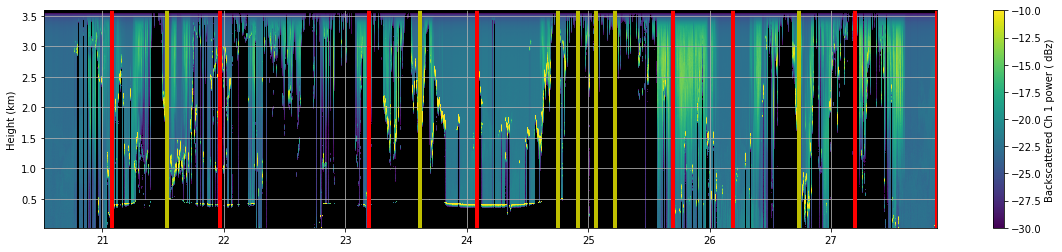

In [18]:
# ida 8/27
fig = plt.figure( figsize=(20, 4))
plt.title = "CRL Measurements of Hurricane Ida, 8/27/21, Eye Pass 1"
make_plots.plot_power_ch1( crl_path, crl_list[12], 0, 13213, 'time')

os.chdir( crl_path)
data = xr.open_dataset( crl_list[12])


# plot lines representing key turning points in tc flight

# flight into TC zone
plt.axvline(x=data.time[1000], c='r', linewidth='4')

# cross section 1 complete
plt.axvline(x=data.time[2600], c='r', linewidth='4')

# cross section 2 complete
# cold air from 3000 to 4000 is from p3 flying a microphysical spiral!
plt.axvline(x=data.time[4800], c='r', linewidth='4')

# cross section 3 complete
plt.axvline(x=data.time[6400], c='r', linewidth='4')

# cross section 4 complete: a wierd, large spiral in the middle
plt.axvline(x=data.time[9300], c='r', linewidth='4')

# small cross section 5 complete
plt.axvline(x=data.time[10200], c='r', linewidth='4')

# long cross section 6 complete
plt.axvline(x=data.time[12000], c='r', linewidth='4')

# northerly return home to florida
plt.axvline(x=data.time[13213], c='r', linewidth='4')


# plot vertical lines showing center location of tc scans

tdr_time_array = [ 21.0 + 32/60, 23.0 + 37/60, 24.0 + 45/60, 24.0 + 55/60, 25.0 + 4/60, 
                 25.0 + 13/60, 26.0 + 44/60 ]

for time in tdr_time_array:
    plt.axvline(x= time, c='y', linewidth='4')

# results: crl cross sections 1, 2, and 7 might all work! if tdr data looks good in those regions

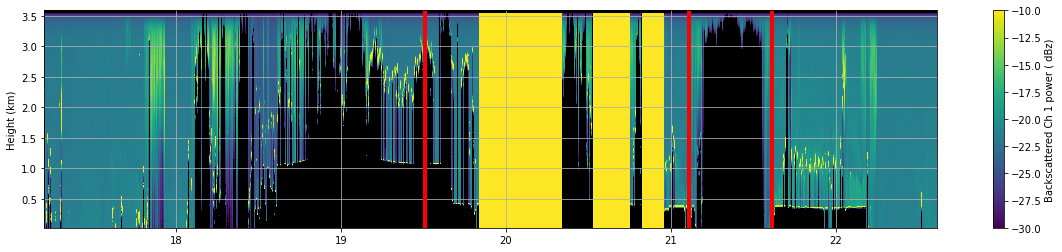

In [16]:
# ida 8/29
fig = plt.figure( figsize=(20, 4))
title = "CRL Measurements of Hurricane Ida, 8/29/21"
make_plots.plot_power_ch1( crl_path, crl_list[14], 0, 9900, 'time')
os.chdir( crl_path)
data = xr.open_dataset( crl_list[14])


# eye pass 1 complete
plt.axvline(x=data.time[4150], c='r', linewidth='4')

# most of eye pass 2 complete
# microphysical spiral around 7500, explains attenuation and cool air on the left edge
plt.axvline(x=data.time[7200], c='r', linewidth='4')

# microphysical spiral over: then goes back and forth through rainband
plt.axvline(x=data.time[8100], c='r', linewidth='4')


